# Streamlit chat frontend

Authors: Giacomo Zuccarino, Jhon Sebastián Moreno Triana.

Programmed as part of the assignment of the course P2.11_advanced_DL_24_25.

Professors: Alerto Cazzaniga, Cristiano de Nobili

Program: Master in High Performance Computing.

Institution: SISSA/ICTP, Trieste.

---

In the following notebook we use the streamlit packege for create a local hosted webpage where any user can interact with the LLM after the CPT and fine tuning.

> 📝 <font color="DodgerBlue"><b>NOTE</b></font>
>
> <font color="DodgerBlue">If you want to check the CPT and fine tuning notebook you can go to [git hub notebook](./Gemma-3-4B-CPT-and-Fine-tuning.ipynb) if you want to open it from the github repository  or  [colab notebook](https://colab.research.google.com/drive/1Fn80nVlwy1vNqx8sMZ6ev4Um6KMNEkGf?usp=sharing) if you want to open it using the google colab platform.</front>

## 0. Installation and setup

We are installing `unsloth`, `streamlit` and its dependencies. Also, we isntall `localtunnel` so we can do a tunneling to the colab local server and a external url.

In [1]:
# Installing unsloth and its dependencies
!pip install -q unsloth transformers accelerate bitsandbytes --upgrade --break-system-packages

# Installing streamlit
!pip install -q streamlit --break-system-packages

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.5/218.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Installing localtunnel
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 3s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

## 1. Running the frontend

Now, we can run the frontend to interact with the model. This can be a little bit tricky but is easy.

> ⚡ <font color="Tomato"><b>IMPORTANT</b> </font>
>
> <font color="Tomato" > The following cell is going to give you a _password_ to connect via `localtunnel` to the streamlit frontend. You have to use it for connect to the frontend.</font>

In [3]:
!curl https://loca.lt/mytunnelpassword

34.126.141.153

Now we write the file that is going to be executed in `streamlit`

In [4]:
%%writefile app.py
# Importing libraries for running the frontend
import streamlit as st
# Usefull for interact with the model
from transformers import pipeline
from transformers import AutoTokenizer
from unsloth import FastLanguageModel

# function to load the model if is needed
@st.cache_resource
def load_model():
    model_name = "Jh0mpis/gemma-3b-physics-instruct-alpaca-v2"
    max_seq_length = 2048

    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name=model_name,
        max_seq_length=max_seq_length,
        dtype=None,
        load_in_4bit=True,
    )
    FastLanguageModel.for_inference(model)
    pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)
    return pipe

# get the pipeline for interact with the model.
pipe = load_model()

# Add a title.
st.title("GPT-like physics assistant")
st.markdown('''
- **Jhon Sebastián Moreno Triana**
- **Giacomo Zuccarino**
''')

# Get the messages history
if "messages" not in st.session_state:
  st.session_state.messages = []

# Render all the messages
for message in st.session_state.messages:
  with st.chat_message(message["role"]):
    st.markdown(message["content"])

# Get the users input and generate the output
if prompt := st.chat_input("Hey, how can I help you today?"):
  with st.chat_message("user"):
    st.markdown(prompt)

  st.session_state.messages.append({ "role" : "user", "content" : prompt})

  response = pipe(prompt, max_new_tokens=512, do_sample=True)[0]['generated_text']
  with st.chat_message("assistant"):
    st.markdown(response)

  st.session_state.messages.append({ "role" : "assistant", "content" : response })

Writing app.py


When you run the following `localtunnel` will generate an url for connect to the frontend. That url will ask for a password that password is the ipv4 that you get from the curl command. That's all.

In [5]:
# Run the frontend
!streamlit run app.py & npx localtunnel --port 8501

⠙


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.126.141.153:8501

your url is: https://major-ways-flash.loca.lt
2025-05-07 11:59:20.527011: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746619160.779828    2071 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746619160.848682    2071 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-07 11:59:21.387359: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following in

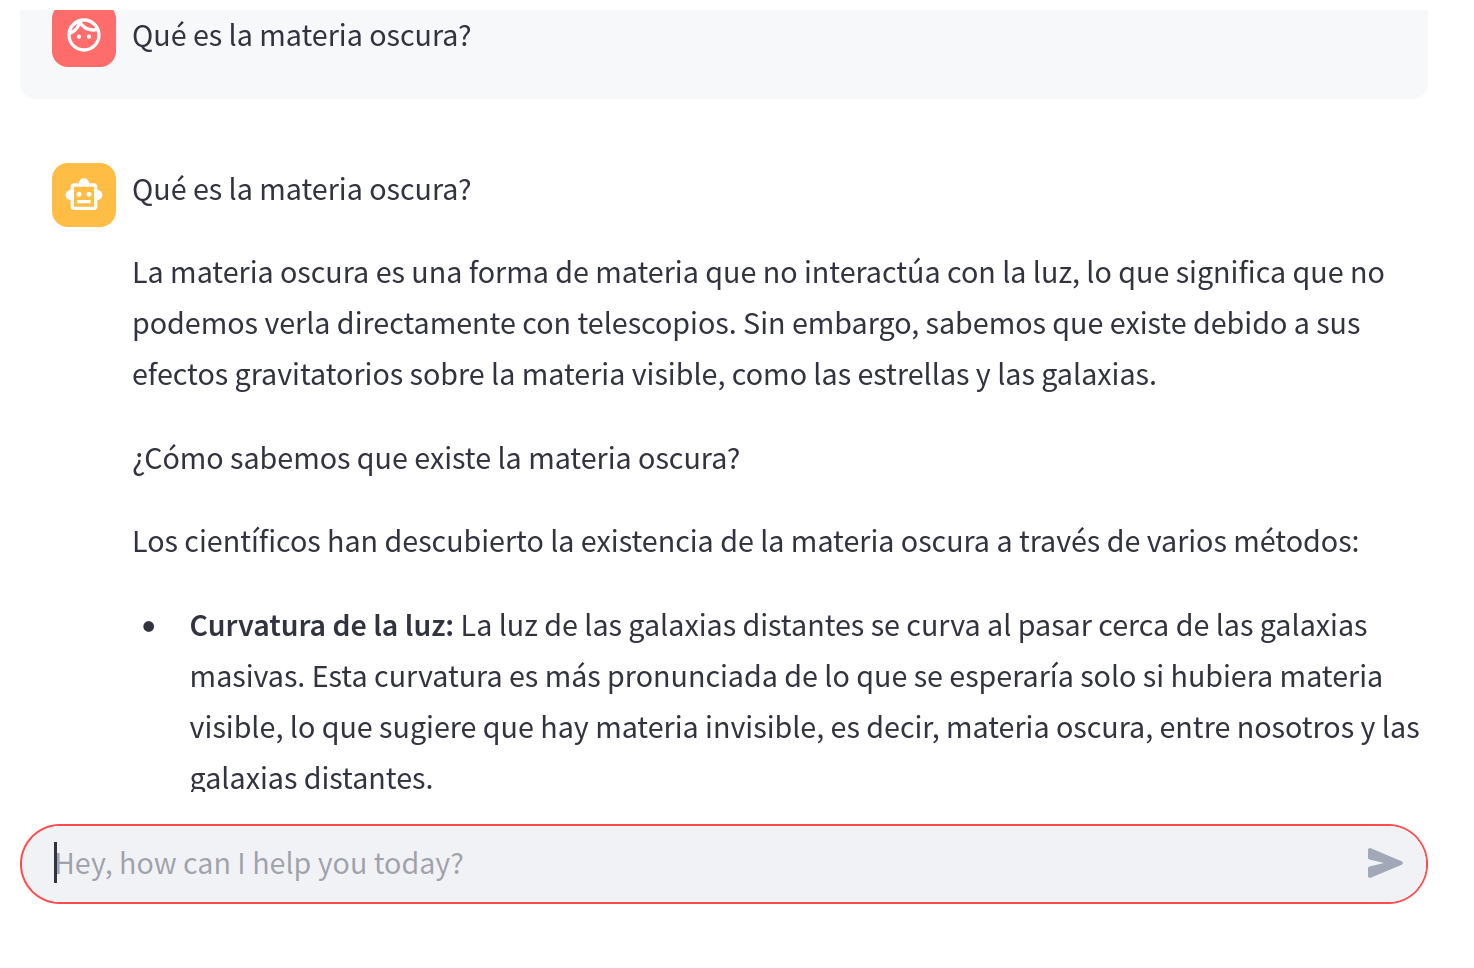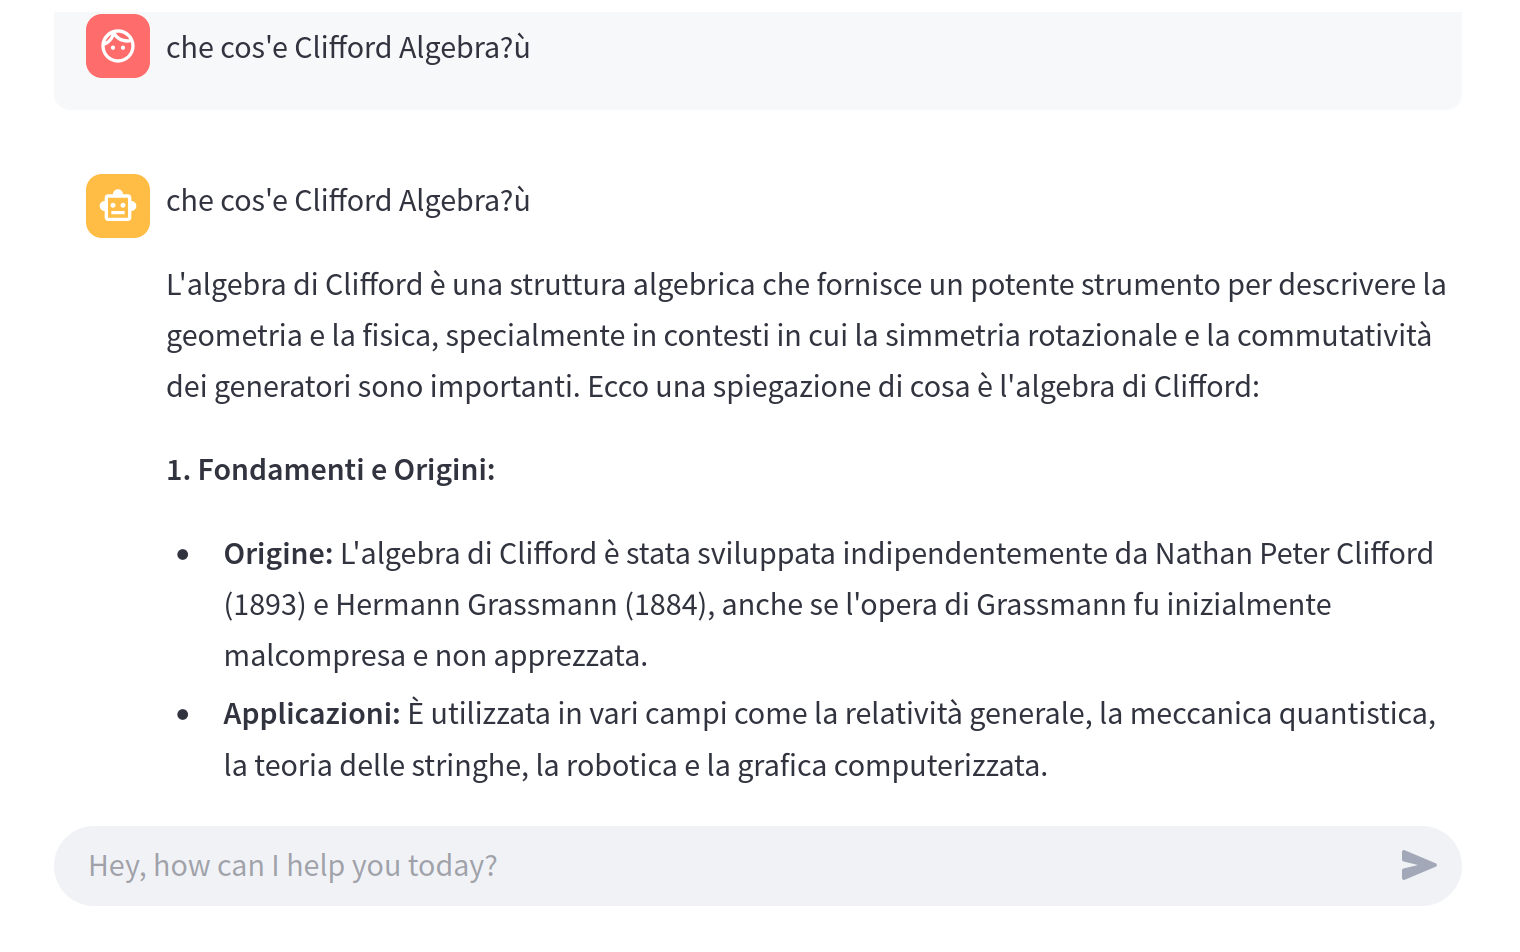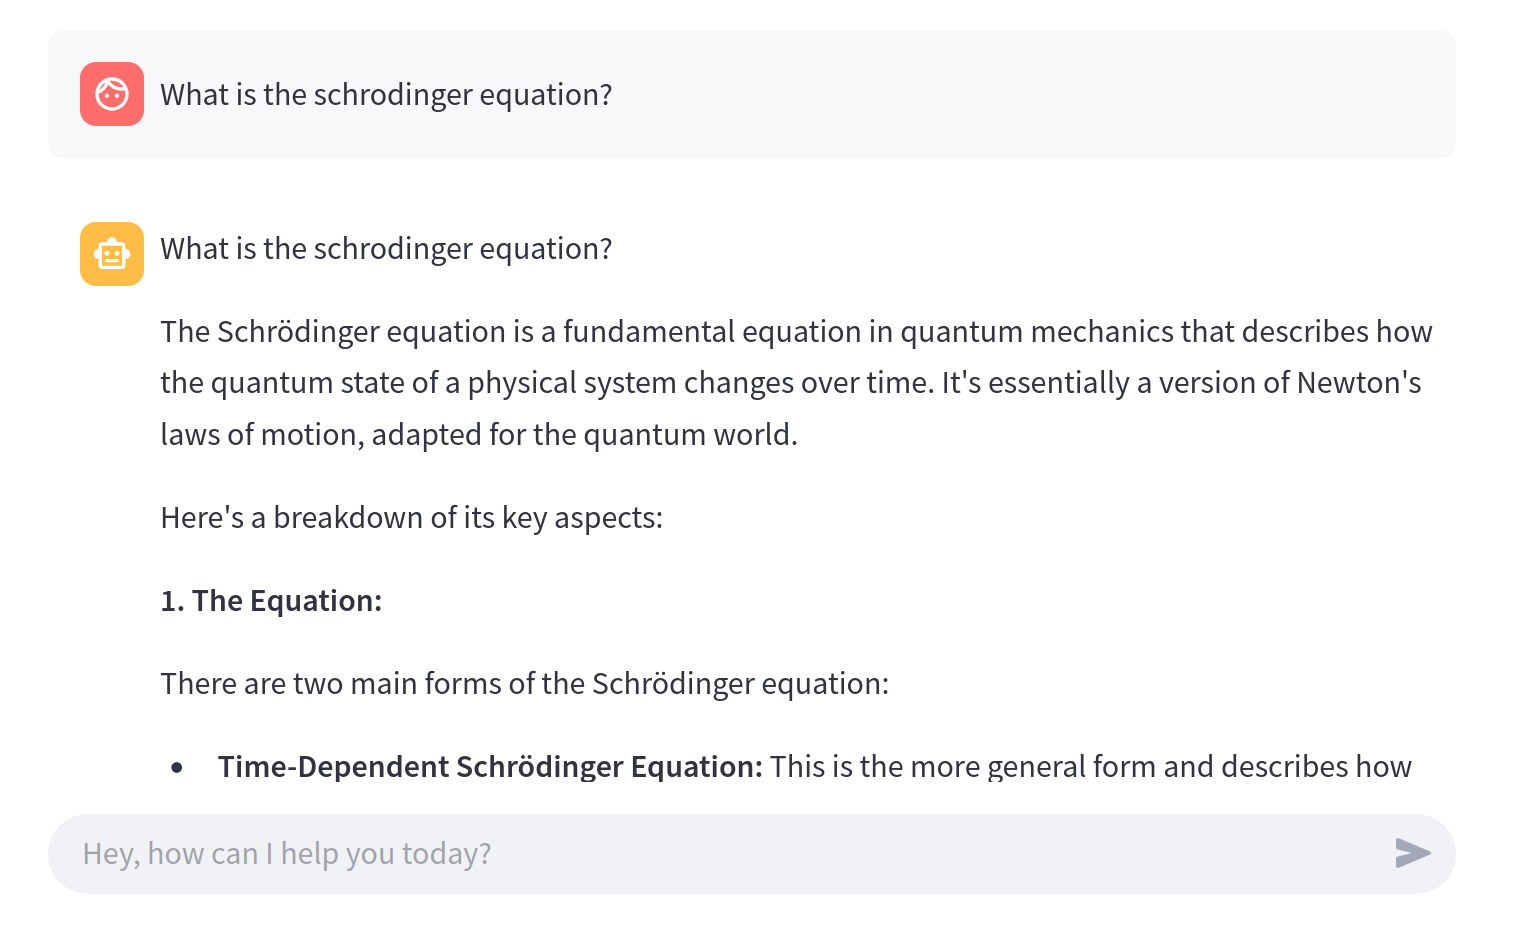